In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats

In [3]:
#Setting options
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)
pd.set_option("display.float_format","{:,.2f}".format)

In [4]:
#importing data set
df = pd.read_csv(r"E:\Pakistan Largest Ecommerce Dataset.csv", low_memory = False)
df.head(10)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,"211,131.00",complete,7/1/2016,kreations_YI 06-L,"1,950.00",1.00,"1,950.00",100147443,Women's Fashion,\N,0.00,cod,7/1/2016,#REF!,"1,950","2,016.00",7.00,2016-7,7-2016,FY17,1.00,NaN,NaN,NaN,NaN,NaN
1,"211,133.00",canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.00,1.00,240.00,100147444,Beauty & Grooming,\N,0.00,cod,7/1/2016,Gross,240,"2,016.00",7.00,2016-7,7-2016,FY17,2.00,NaN,NaN,NaN,NaN,NaN
2,"211,134.00",canceled,7/1/2016,Ego_UP0017-999-MR0,"2,450.00",1.00,"2,450.00",100147445,Women's Fashion,\N,0.00,cod,7/1/2016,Gross,"2,450","2,016.00",7.00,2016-7,7-2016,FY17,3.00,NaN,NaN,NaN,NaN,NaN
3,"211,135.00",complete,7/1/2016,kcc_krone deal,360.00,1.00,60.00,100147446,Beauty & Grooming,R-FSD-52352,300.00,cod,7/1/2016,Net,360,"2,016.00",7.00,2016-7,7-2016,FY17,4.00,NaN,NaN,NaN,NaN,NaN
4,"211,136.00",order_refunded,7/1/2016,BK7010400AG,555.00,2.00,"1,110.00",100147447,Soghaat,\N,0.00,cod,7/1/2016,Valid,"1,110","2,016.00",7.00,2016-7,7-2016,FY17,5.00,NaN,NaN,NaN,NaN,NaN
5,"211,137.00",canceled,7/1/2016,UK_Namkino All In One 200 Gms,80.00,1.00,80.00,100147448,Soghaat,\N,0.00,cod,7/1/2016,Gross,80,"2,016.00",7.00,2016-7,7-2016,FY17,6.00,NaN,NaN,NaN,NaN,NaN
6,"211,138.00",complete,7/1/2016,kcc_krone deal,360.00,1.00,60.00,100147449,Beauty & Grooming,\N,300.00,cod,7/1/2016,Net,360,"2,016.00",7.00,2016-7,7-2016,FY17,7.00,NaN,NaN,NaN,NaN,NaN
7,"211,139.00",complete,7/1/2016,UK_Namkino Mix Nimco 400 Gms,170.00,1.00,170.00,100147450,Soghaat,\N,0.00,cod,7/1/2016,Net,170,"2,016.00",7.00,2016-7,7-2016,FY17,6.00,NaN,NaN,NaN,NaN,NaN
8,"211,140.00",canceled,7/1/2016,Apple iPhone 6S 64GB,"96,499.00",1.00,"96,499.00",100147451,Mobiles & Tablets,\N,0.00,ublcreditcard,7/1/2016,Gross,"96,499","2,016.00",7.00,2016-7,7-2016,FY17,8.00,NaN,NaN,NaN,NaN,NaN
9,"211,141.00",canceled,7/1/2016,Apple iPhone 6S 64GB,"96,499.00",1.00,"96,499.00",100147452,Mobiles & Tablets,\N,0.00,mygateway,7/1/2016,Gross,"96,499","2,016.00",7.00,2016-7,7-2016,FY17,8.00,NaN,NaN,NaN,NaN,NaN


In [5]:

#Removing all missing rows and columns from the data
df.dropna(how = "all", inplace = True)
df.columns
df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [6]:
#Renaming Columns that aren't named good
df = df.rename(columns={
"status":"order_status",
"sku":"product_id",
"qty_ordered":"quantity",
"grand_total":"total_price",
"category_name_1":"category",
"discount_amount":"discount",
"Working Date":"working_date",
"MV":"market_value",
"Customer ID":"customer_id",
"BI Status":"bi_status",
"MV":"market_value",
"Year":"year",
"Month":"month",
"Customer Since":"customer_since",
"M-Y":"month_year",
"FY":"financial_year"
})
df.columns

Index(['item_id', 'order_status', 'created_at', 'product_id', 'price',
       'quantity', 'total_price', 'increment_id', 'category',
       'sales_commission_code', 'discount', 'payment_method', 'working_date',
       'bi_status', ' MV ', 'year', 'month', 'customer_since', 'month_year',
       'financial_year', 'customer_id'],
      dtype='object')

In [ ]:
#Removing Duplicates
df.duplicated().sum()
#Fixing Formats
df["created_at"]= pd.to_datetime(df["created_at"])
df["customer_since"]= pd.to_datetime(df["customer_since"])
df["month_year"]= pd.to_datetime(df["month_year"])

In [8]:
#Changing names of unique values if they are not understandable or good
df["category"].value_counts()
df["category"] = df["category"].replace(r"\N", "Others")

In [9]:
#filling Missing values
df.isna().sum()
df['order_status']= df['order_status'].fillna(df["order_status"].mode()[0])
df['product_id']= df['product_id'].fillna(df["product_id"].mode()[0])
df['category']= df['category'].fillna(df["category"].mode()[0])
df['customer_since']= df['customer_since'].fillna(df["customer_since"].mode()[0])
df['customer_id']= df['customer_id'].fillna(df["customer_id"].mode()[0])
df['sales_commission_code'] = df['sales_commission_code'].fillna(df["sales_commission_code"].mode()[0])
df.isna().sum()

item_id                  0
order_status             0
created_at               0
product_id               0
price                    0
quantity                 0
total_price              0
increment_id             0
category                 0
sales_commission_code    0
discount                 0
payment_method           0
working_date             0
bi_status                0
 MV                      0
year                     0
month                    0
customer_since           0
month_year               0
financial_year           0
customer_id              0
dtype: int64

In [10]:
#handling same variables of the data set
df["order_status"].value_counts()
df["order_status"] = df["order_status"].replace("received", "complete")
df["order_status"] = df["order_status"].replace("paid", "complete")
df["order_status"] = df["order_status"].replace("closed", "canceled")
df["order_status"] = df["order_status"].replace("fraud", "canceled")
df["order_status"] = df["order_status"].replace("order_refunded", "refund")
df["order_status"] = df["order_status"].replace("exchange", "refund")
df["order_status"] = df["order_status"].replace("processing", "pending")
df["order_status"] = df["order_status"].replace("pending_paypal", "pending")
df["order_status"] = df["order_status"].replace("cod", "pending")
#Using Raw cause it gives error other wise
df["order_status"] = df["order_status"].replace(r"\N", "pending")
df["order_status"] = df["order_status"].replace("payment_review", "pending")
df["order_status"] = df["order_status"].replace("holded", "pending")

In [11]:
#Making Line graph for the Catagories
#Describing Palette
#plotting outliers
palette = ({
"Others":"red",
"Computing":"cyan",
"Entertainment":"gray",
"Appliances":"black",
"Mobiles & Tablets":"green",
"Men's Fashion":"orange",
"Women's Fashion":"pink",
"Superstore":"blue",
"Beauty & Grooming":"purple",
"Health & Sports":"navy",
"Home & Living":"brown",
"Soghaat":"lime",
"Kids & Baby":"teal",
"School & Education":"brown",
"Books":"yellow"
})

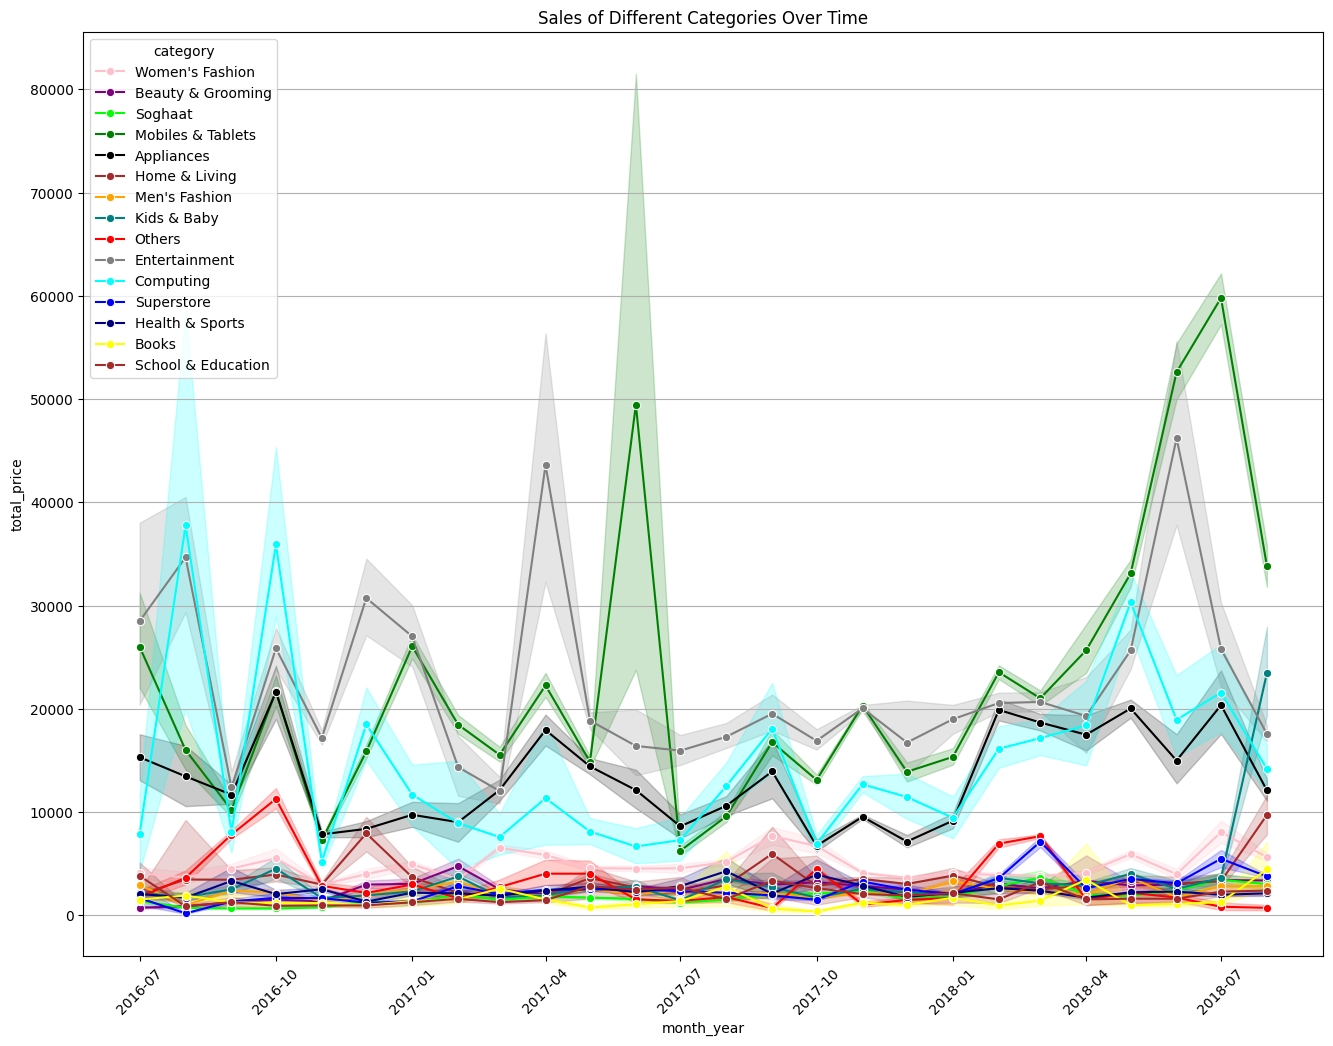

In [12]:
#Making Graph now
plt.figure(figsize=(16,12))
sns.lineplot(x = "month_year", y = "total_price", data = df, hue = "category",palette= palette, marker = "o")
plt.title("Sales of Different Categories Over Time")
plt.xticks(rotation = 45)
plt.grid(axis = "y")
plt.show()

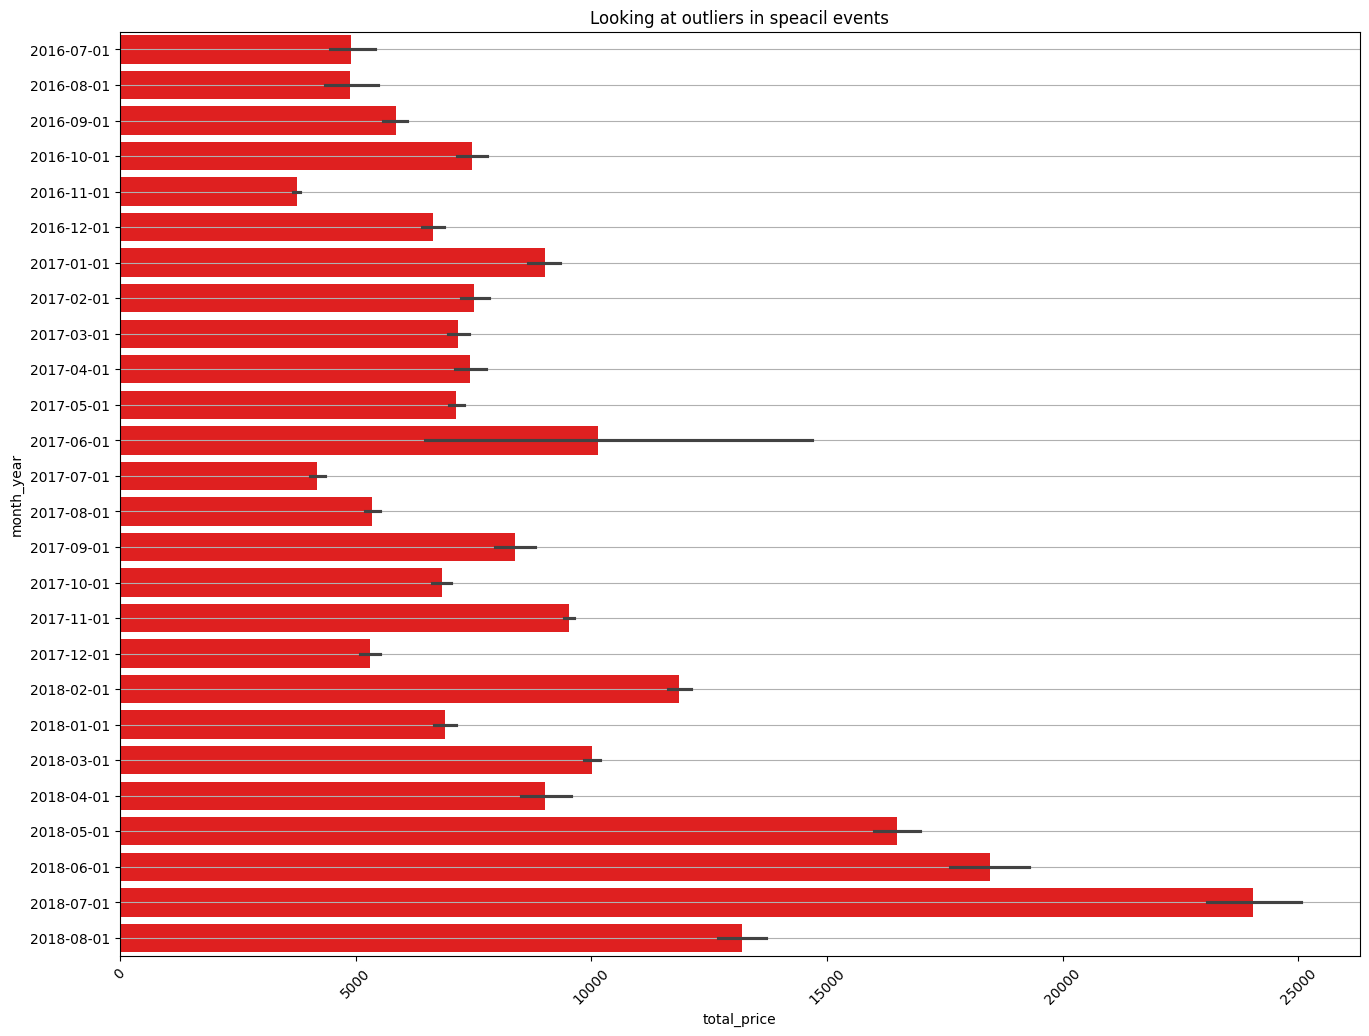

In [13]:
#Making Box plot
plt.figure(figsize=(16,12))
sns.barplot(x = "total_price", y = "month_year",color = "red", data = df)
plt.title("Looking at outliers in speacil events")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.show()

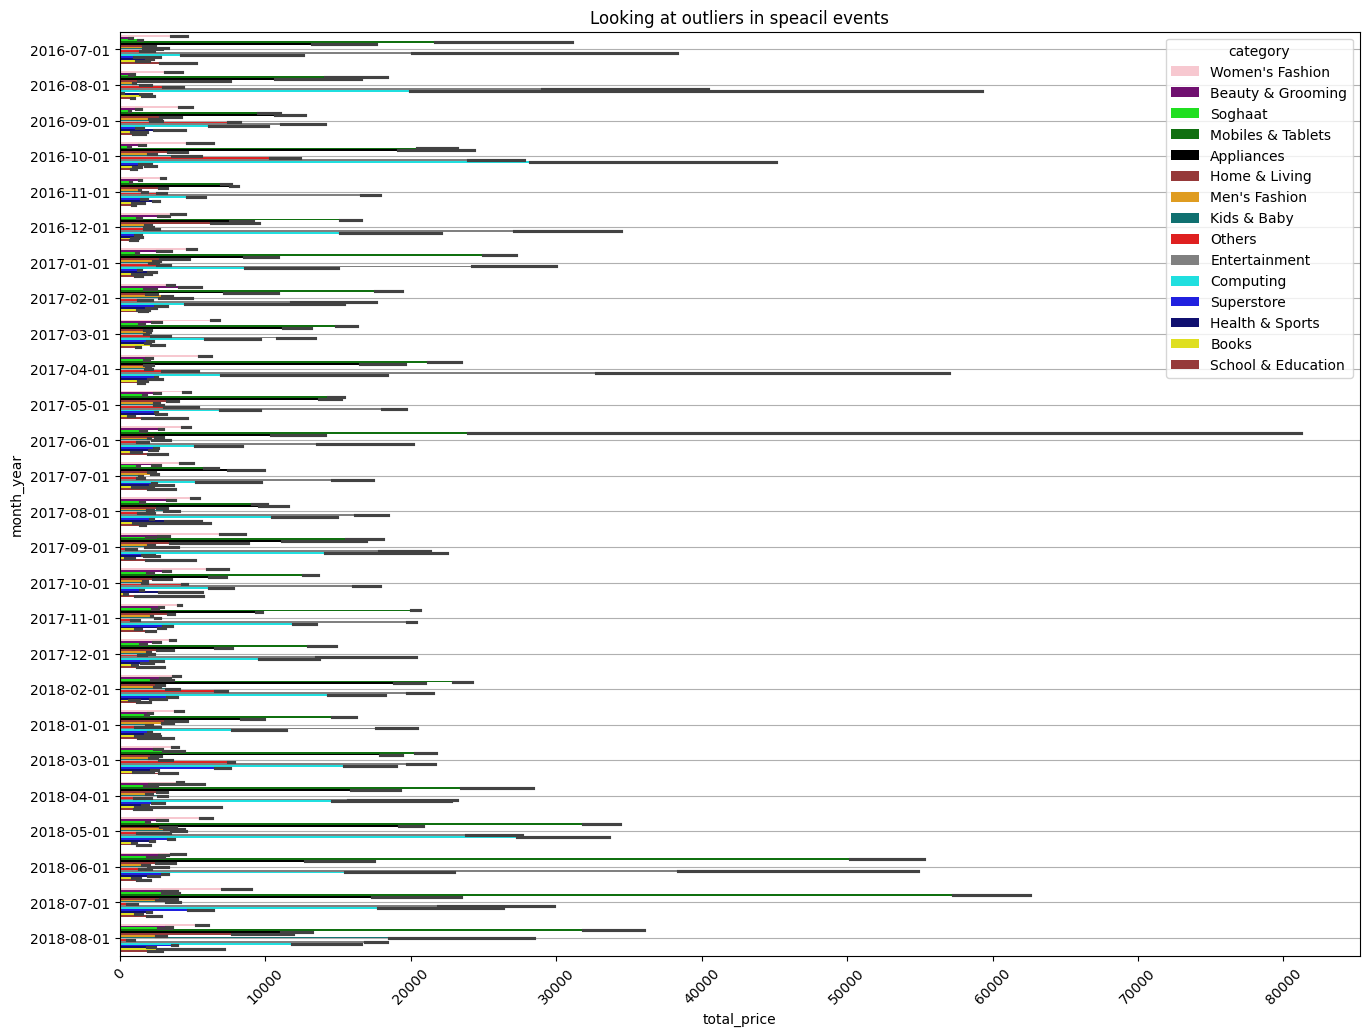

In [14]:
#Making Box plot
plt.figure(figsize=(16,12))
sns.barplot(x = "total_price", y = "month_year", hue = "category", data = df, palette = palette)
plt.title("Looking at outliers in speacil events")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.show()

In [15]:
months = [ 
    "2016-06-01",
    "2017-07-01",
    "2017-11-01",
    "2018-05-01",
    "2018-06-01",
    "2018-07-01",
    "2018-08-01"
 ]
#06 2016, 07, 11 2017, 05, 06, 07, 08 2018
events = df[df["month_year"].isin(months)]
events
normal = df[~df["month_year"].isin(months)]
normal
months = [ 
    "2016-06-01",
    "2017-07-01",
    "2017-11-01",
    "2018-05-01",
    "2018-06-01",
    "2018-07-01",
    "2018-08-01"
 ]

In [16]:
#06 2016, 07, 11 2017, 05, 06, 07, 08 2018
events = df[df["month_year"].isin(months)]
events
normal = df[~df["month_year"].isin(months)]
normal
normal.sort_values(by = "total_price", ascending = False)

,item_id,order_status,created_at,product_id,price,quantity,total_price,increment_id,category,sales_commission_code,discount,payment_method,working_date,bi_status,MV,year,month,customer_since,month_year,financial_year,customer_id
239382,"507,562.00",canceled,2017-06-08,IDROID_BALRX7-Gold,"8,944.00","1,000.00","17,888,000.00",100323300,Mobiles & Tablets,\N,0.00,jazzvoucher,6/8/2017,Gross,"8,944,000","2,017.00",6.00,2016-08-01,2017-06-01,FY17,"5,032.00"
239381,"507,561.00",canceled,2017-06-08,IDROID_BALRX7-Jet black,"8,944.00","1,000.00","17,888,000.00",100323300,Mobiles & Tablets,\N,0.00,jazzvoucher,6/8/2017,Gross,"8,944,000","2,017.00",6.00,2016-08-01,2017-06-01,FY17,"5,032.00"
239377,"507,557.00",canceled,2017-06-08,IDROID_BALRX7-Jet black,"8,944.00","1,000.00","17,888,000.00",100323297,Mobiles & Tablets,\N,0.00,jazzwallet,6/8/2017,Gross,"8,944,000","2,017.00",6.00,2016-08-01,2017-06-01,FY17,"5,032.00"
239376,"507,556.00",canceled,2017-06-08,IDROID_BALRX7-Gold,"8,944.00","1,000.00","17,888,000.00",100323297,Mobiles & Tablets,\N,0.00,jazzwallet,6/8/2017,Gross,"8,944,000","2,017.00",6.00,2016-08-01,2017-06-01,FY17,"5,032.00"
240079,"508,369.00",complete,2017-06-09,IDROID_BALRX7-Jet black,"8,944.00","1,000.00","17,888,000.00",100323649,Mobiles & Tablets,\N,0.00,jazzvoucher,6/9/2017,Net,"8,944,000","2,017.00",6.00,2017-06-01,2017-06-01,FY17,"50,387.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434604,"734,966.00",refund,2018-01-27,APPSHA59EDFE7AD47B1,79.00,1.00,"-1,311.50",100447905,Appliances,\N,"1,489.50",Easypay,1/27/2018,Valid,79,"2,018.00",1.00,2017-05-01,2018-01-01,FY18,"46,120.00"
434601,"734,962.00",refund,2018-01-27,HASASA5A54B0F15B222,299.00,1.00,"-1,311.50",100447905,Health & Sports,\N,"1,489.50",Easypay,1/27/2018,Valid,299,"2,018.00",1.00,2017-05-01,2018-01-01,FY18,"46,120.00"
434605,"734,967.00",refund,2018-01-27,MATBIG59AC9147C07E7,999.00,1.00,"-1,311.50",100447905,Mobiles & Tablets,\N,"1,489.50",Easypay,1/27/2018,Valid,999,"2,018.00",1.00,2017-05-01,2018-01-01,FY18,"46,120.00"
434602,"734,963.00",refund,2018-01-27,APPBUY5A5ED09AF213C,"1,590.00",1.00,"-1,311.50",100447905,Appliances,\N,"1,489.50",Easypay,1/27/2018,Valid,"1,590","2,018.00",1.00,2017-05-01,2018-01-01,FY18,"46,120.00"


In [18]:
df1 = normal.groupby(["order_status", "category"]).agg(
    {
    "quantity": "sum",
    "total_price":"sum",
    "price":"sum"
}
).reset_index()
df1
#Doing Normal Data set first
df1["category"].value_counts()
df1["category"].value_counts()

category
Appliances            4
Beauty & Grooming     4
Books                 4
Computing             4
Entertainment         4
Health & Sports       4
Home & Living         4
Kids & Baby           4
Men's Fashion         4
Mobiles & Tablets     4
Others                4
School & Education    4
Soghaat               4
Superstore            4
Women's Fashion       4
Name: count, dtype: int64

In [20]:
cat = ["appliances", "Beauty", "books", "computing", "entertainment", "health_sports",
"houme_living", "kids_baby", "mens_fashion", "mobiles_tablets", "others", "school_education",
"soghaat", "superstore", "womens_fashion"]
category = ["appliances", "Beauty", "books", "computing", "entertainment", "health_sports",
"houme_living", "kids_baby", "mens_fashion", "mobiles_tablets", "others", "school_education",
"soghaat", "superstore", "womens_fashion"]
cat = ["appliances", "Beauty", "books", "computing", "entertainment", "houme_living", "kids_baby", "mens_fashion", "mobiles_tablets", "others", "school_education",
"soghaat", "superstore", "womens_fashion"]
category = ["appliances", "Beauty", "books", "computing", "entertainment", "health_sports",
"houme_living", "kids_baby", "mens_fashion", "mobiles_tablets", "others", "school_education",
"soghaat", "superstore", "womens_fashion"]
normal.sort_values(by = "total_price", ascending = False)

,item_id,order_status,created_at,product_id,price,quantity,total_price,increment_id,category,sales_commission_code,discount,payment_method,working_date,bi_status,MV,year,month,customer_since,month_year,financial_year,customer_id
239382,"507,562.00",canceled,2017-06-08,IDROID_BALRX7-Gold,"8,944.00","1,000.00","17,888,000.00",100323300,Mobiles & Tablets,\N,0.00,jazzvoucher,6/8/2017,Gross,"8,944,000","2,017.00",6.00,2016-08-01,2017-06-01,FY17,"5,032.00"
239381,"507,561.00",canceled,2017-06-08,IDROID_BALRX7-Jet black,"8,944.00","1,000.00","17,888,000.00",100323300,Mobiles & Tablets,\N,0.00,jazzvoucher,6/8/2017,Gross,"8,944,000","2,017.00",6.00,2016-08-01,2017-06-01,FY17,"5,032.00"
239377,"507,557.00",canceled,2017-06-08,IDROID_BALRX7-Jet black,"8,944.00","1,000.00","17,888,000.00",100323297,Mobiles & Tablets,\N,0.00,jazzwallet,6/8/2017,Gross,"8,944,000","2,017.00",6.00,2016-08-01,2017-06-01,FY17,"5,032.00"
239376,"507,556.00",canceled,2017-06-08,IDROID_BALRX7-Gold,"8,944.00","1,000.00","17,888,000.00",100323297,Mobiles & Tablets,\N,0.00,jazzwallet,6/8/2017,Gross,"8,944,000","2,017.00",6.00,2016-08-01,2017-06-01,FY17,"5,032.00"
240079,"508,369.00",complete,2017-06-09,IDROID_BALRX7-Jet black,"8,944.00","1,000.00","17,888,000.00",100323649,Mobiles & Tablets,\N,0.00,jazzvoucher,6/9/2017,Net,"8,944,000","2,017.00",6.00,2017-06-01,2017-06-01,FY17,"50,387.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434604,"734,966.00",refund,2018-01-27,APPSHA59EDFE7AD47B1,79.00,1.00,"-1,311.50",100447905,Appliances,\N,"1,489.50",Easypay,1/27/2018,Valid,79,"2,018.00",1.00,2017-05-01,2018-01-01,FY18,"46,120.00"
434601,"734,962.00",refund,2018-01-27,HASASA5A54B0F15B222,299.00,1.00,"-1,311.50",100447905,Health & Sports,\N,"1,489.50",Easypay,1/27/2018,Valid,299,"2,018.00",1.00,2017-05-01,2018-01-01,FY18,"46,120.00"
434605,"734,967.00",refund,2018-01-27,MATBIG59AC9147C07E7,999.00,1.00,"-1,311.50",100447905,Mobiles & Tablets,\N,"1,489.50",Easypay,1/27/2018,Valid,999,"2,018.00",1.00,2017-05-01,2018-01-01,FY18,"46,120.00"
434602,"734,963.00",refund,2018-01-27,APPBUY5A5ED09AF213C,"1,590.00",1.00,"-1,311.50",100447905,Appliances,\N,"1,489.50",Easypay,1/27/2018,Valid,"1,590","2,018.00",1.00,2017-05-01,2018-01-01,FY18,"46,120.00"


In [23]:
#Plottting its graph
for i, a in zip(cat, category):
    plt.figure(figsize=(8, 6))
    sns.barplot(x = "month_year", y = "total_price", data = i)
    plt.suptitle(f"Differnce between Order Status in {a} Category")
    plt.grid(axis = "y")

    plt.show()
    print(i)

TypeError: Data source must be a DataFrame or Mapping, not <class 'str'>.

<Figure size 800x600 with 0 Axes>

In [ ]:
#Plottting its graph
for i, a in zip(cat, category):
    plt.figure(figsize=(8, 6))
    sns.barplot(x = "order_status", y = "total_price", data = i, palette = "dark:blue", errorbar = None)
    plt.suptitle(f"Differnce between Order Status in {a} Category")
    plt.grid(axis = "y")
    plt.show()
    print(i)t, health_sports,
